In [31]:
import pandas as pd
import pathlib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading data

In [14]:
sampled_planned_cities_idx_path = pathlib.Path("../../data/POC2_data/random_planned_cities_id.pkl")
sampled_not_planned_cities_idx_path = pathlib.Path("../../data/POC2_data/random_not_planned_cities_id.pkl")

In [15]:
sampled_planned_cities_idx = np.load(sampled_planned_cities_idx_path, allow_pickle=True)
sampled_not_planned_cities_idx = np.load(sampled_not_planned_cities_idx_path, allow_pickle=True)

In [22]:
all_cities_info_path = pathlib.Path("../../data/POC1_data/final_df.csv")
all_cities_info_df = pd.read_csv(all_cities_info_path)

In [27]:
all_cities_info_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,21way_int_prop,22way_int_prop,23way_int_prop,24way_int_prop,25way_int_prop,26way_int_prop,27way_int_prop,28way_int_prop,pop_density,prop_used_area
0,indonesia,IDN,wates,12375,0.036690,0.038630,0.004276,0.004359,1.065403,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22689.351429,0.168496
1,brazil,BRA,taquaralto,1186,0.024520,0.035016,0.001195,0.001439,1.008276,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9363.163689,0.481018
2,china,CHN,xinqiao,12218,0.036481,0.045724,0.001608,0.001723,1.016544,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4747.217111,0.525190
3,colombia,COL,yopal,687,0.016110,0.019414,0.001072,0.001221,1.011106,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29654.434191,0.352858
4,czech_republic,CZE,pilsen,2886,0.032913,0.044298,0.001418,0.001758,1.047311,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5057.822603,0.530648


In [38]:
all_ids = np.concatenate([sampled_planned_cities_idx, sampled_not_planned_cities_idx])
sampled_cities_info_df = all_cities_info_df[all_cities_info_df['uc_id'].isin(all_ids)].copy()

In [39]:
sampled_cities_info_df['planned'] = sampled_cities_info_df['uc_id'].apply(lambda x: 1 if x in sampled_planned_cities_idx else 0)

# Plotting

Text(0.5, 1.0, 'Sampled cities')

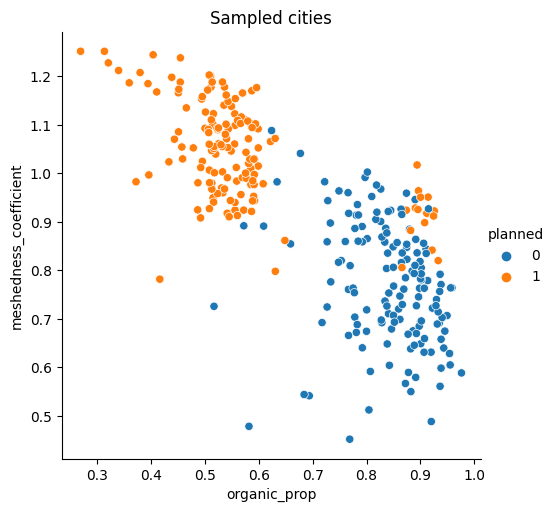

In [43]:
sns.relplot(sampled_cities_info_df, x='organic_prop', y='meshedness_coefficient', hue='planned')
plt.title("Sampled cities")

Text(0.5, 1.0, 'Sampled cities')

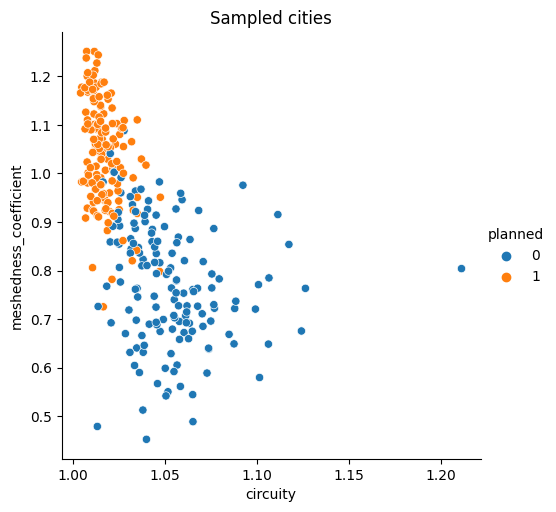

In [44]:
sns.relplot(sampled_cities_info_df, x='circuity', y='meshedness_coefficient', hue='planned')
plt.title("Sampled cities")

Text(0.5, 1.0, 'Sampled cities')

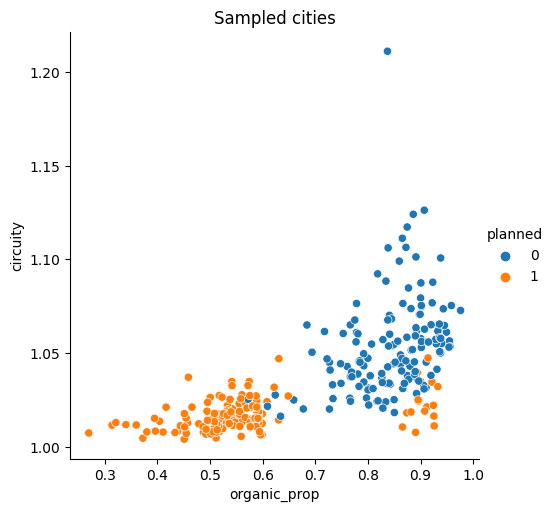

In [45]:
sns.relplot(sampled_cities_info_df, x='organic_prop', y='circuity', hue='planned')
plt.title("Sampled cities")

Text(0.5, 1.0, 'Sampled cities')

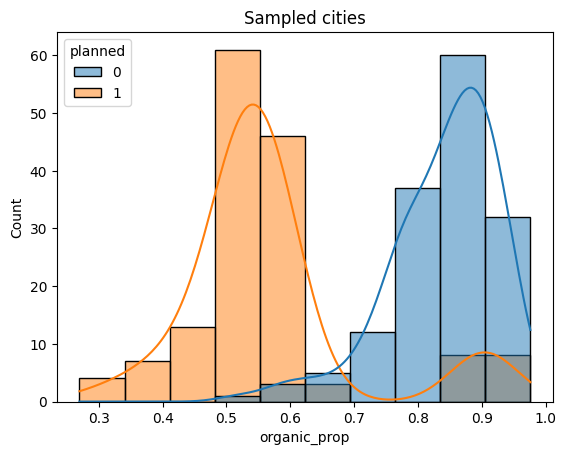

In [47]:
sns.histplot(data=sampled_cities_info_df, x='organic_prop', hue='planned', kde=True)
plt.title("Sampled cities")

Text(0.5, 1.0, 'Sampled cities')

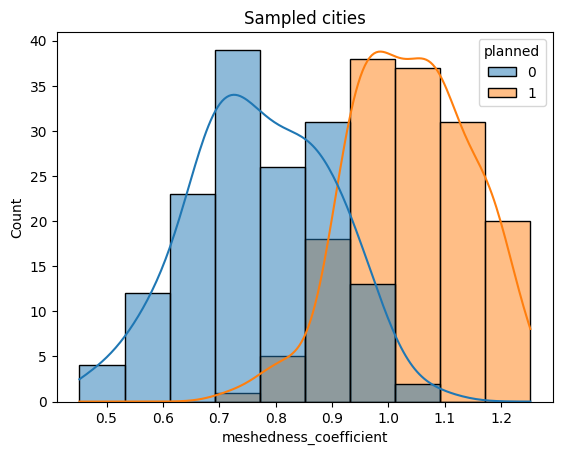

In [48]:
sns.histplot(data=sampled_cities_info_df, x='meshedness_coefficient', hue='planned', kde=True)
plt.title("Sampled cities")

Text(0.5, 1.0, 'Sampled cities')

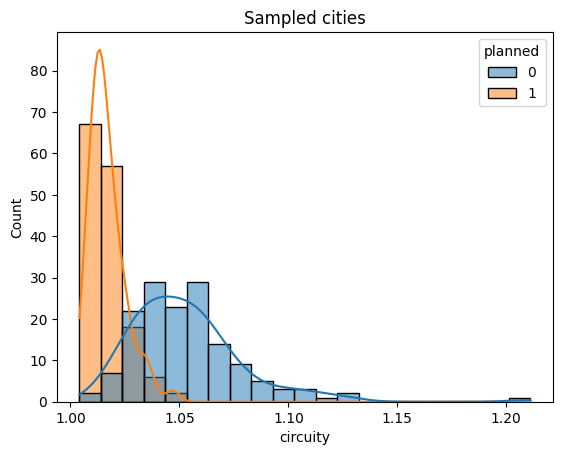

In [49]:
sns.histplot(data=sampled_cities_info_df, x='circuity', hue='planned', kde=True)
plt.title("Sampled cities")

# Saving

In [50]:
sampled_cities_info_path = pathlib.Path("../../data/POC2_data/sampled_cities/info.csv")
sampled_cities_info_df.to_csv(sampled_cities_info_path, index=False)